<font size=5><center>Assessment of Air Quality Associated with Socioeconomic Status in China</center >
<br>
<font size=4><center>By Wenyuan Cui and Hao Wu</center >


# 1. Introduction

<font size=4>What is air pollution and what causes it?

Due to a rapid economic development, industrial expansion and urbanization during the last few decades in China,there has been a sharp increase in energy consumption.This staggering increase in energy consumption accompanied with lax environmental regulations has led to the release of pollutants into the air that are detrimental to human health and the planet as a whole.The increasingly occurrence of haze or smog episodes characterized by the PM2.5, PM10, sulfur dioxide (SO2), ozone (O3), carbon monoxide (CO) and nitrogen dioxide (NO2) levels and reduced visibility has been reported in national-scale China especially in the most developed and high-populated city clusters such as Beijing, Shanghai, Chengdu ,Wuhan and Kunming. Some research show that the energy consumptions keep high levels in the developed cities in China, which will accelerate the emission of air polltants such as sulfur dioxide and carbon dioxide into the air. 

<font size=4>Why the air quality analysis matters?

According to a report published earlier this year by the World Health Organisation, air pollution now kills approximately seven million people annually, worldwide. This accounts for as much as one in eight deaths, and is by far the single biggest environmental health risk. In order to  take action to clean up air in China, it’s important to first understand where the pollution is most concentrated, how it occurs, what elements are involved. By completely understanding the reasons behind air pollution, we can not only actively avoid overly contaminated areas in our daily routines but also try to implement measures to curb such pollution.

<font size=4>What benefits this project can provide to the society, organizations, or individuals.

This project can provide the insights into the air quality and pollutants with the Gross Domestic Product (GDP) and energy consumption (coal and petrol) in China. It is important for our governments and some environmental protection agencies for helping them draw up better policies and measures such as pollutant emission standard. In this way, the lifehood of the people will be improved and the risk of diabetes, heart disease, and several cancers will be reduced.

<font size=4>Major work

The major study consists (1) the occurrence length and percentage of air quality index in five Chinese cities from 2015-2017; (2) the distribution and trends of different air pollutants for major regions in four seasons; (3) the influence of different air pollutants on air quality index by regression analysis; (4) linking the air quality with the amount of energy consumed and Gross Domestic Product (GDP) through time series method; (5) predicting the trends of air quality index. 
The overall manuscripts are organized as follows. The first part is the introduction of the air pollution in China. The second part provides the data information and analyses on descriptive statistics on the percentage and duration of different air pollutants concentration ranges. The third portion compares features such as the mean concentration, 25th and 50th percentiles, variance,etc with the change of time. At last,  the regression analysis and prediction will be performed according to extracted features from the datasets. 

# 2. Data Source and Collection

The air quality and pollutants datasets are collected from PM2.5.in (http://pm25.in/) updated daily. The data source is measured from China National Environmental Monitoring Station of the national city air quality real-time release platform.（http://www.cnemc.cn/sssj2092874.jhtml）

The time period for the data is between January 2015 to December 2017. Missing data are denoted as NA. The sample size is 450 MB.

- NO1: row number
- NO2: column number (city names)
- year: year of data in this row
- month: month of data in this row
- day: day of data in this row
- hour: hour of data in this row
- PM2.5: PM2.5 concentration (mg/m^3)
- PM2.5_24h: PM2.5 concentration 24 hourly average (mg/m^3)
- PM10: PM10 concentration (mg/m^3)
- PM10_24h: PM10 concentration 24 hourly average (mg/m^3)
- AQI: air quality index real time value
- SO2: sulfur dioxide real time concentration (mg/m^3)
- SO2_24h: sulfur dioxide 24 hourly average (mg/m^3)
- NO2: nitrogen dioxide real time concentration (mg/m^3)
- NO2_24h: nitrogen dioxide 24 hourly average (mg/m^3)
- O3: ozone real time concentration (mg/m^3)
- CO: carbon monoxide real time concentration (mg/m^3)
- CO_24h: carbon monoxide 24 hourly average(mg/m^3)
- Season: season of data in this row
- TEMP: temperature (Celsius degree)
- PRES: pressure (hPa)
- HUMI: humidity(%)
- lws: cumulated wind speed(m/s)
- cbwd: combined wind direction 
- Precipitation: hourly precipitation (mm)
- Iprec: cumulated precipitation (mm)

The data is obtained from the websites as follows: http://beijingair.sinaapp.com/


# 3. Data manipulation

The datasets are collected on each month and the monthlyl datasets are generated into one file for 2015, 2016 and 2017.
Five target cities with the variables and datetime information are extracted from the datasets. 
Missing values are filled with the mean of the corresponding columns. 

In [1]:
# import modules
import pandas as pd
import numpy as np
import dateutil
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale
import statsmodels.api as sm
from patsy import dmatrices
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

/Users/wenyuancui/anaconda/envs/Python3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Below is the steps of cleaning the dataset. Since this step has been demonstrated in M2, the details are not fully presented in M3. 

In [ ]:
# The datasets are collected based on each month. Put the monthly datasets into one file called 2015.csv
# Repeat the procedure for 2016 and 2017
file_name = 'airquality2015{}.csv'
df_list=[]
for i in range(1,13):
    df_list.append(pd.read_csv(file_name.format(i)))
df = pd.concat(df_list)
df.to_csv('airquality2015.csv')

In [ ]:
# Convert the date to datetime 
dat2015 = pd.read_csv('airquality2015.csv')
dat2015['date'] = dat2015['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [ ]:
# Extract the Year, Month and Day information and put them into new columns
dat2015['year'],dat2015['month'],dat2015['day'] = dat2015['date'].dt.year,dat2015['date'].dt.month,dat2015['date'].dt.day

In [ ]:
# Select the five representative Chinese cities, Date, Pollution type information 
dat2015 = dat2015[['year','month','day','hour','type','beijing','shanghai','chengdu','wuhan','kunming']]
dat2015.columns = ['Year','Month','Day','Hour','Type','Beijing','Shanghai','Chengdu','Wuhan','Kunming']
dat2015.head()

In [ ]:
dat2015.info()

In [ ]:
# Drop the NaN in dat2015
dat2015=dat2015.dropna()
dat2015.to_csv('airquality2015.csv')
dat2015.head()

The prediction dataset contains the Air Quality Index (AQI) and the weather conditions including the temperature, humidity, wind direction, wind speed, precipitation, month and season . The dataset contains about 9000 observations.

In [2]:
# Prediction Dataset
dat_pred = pd.read_csv('Beijing2015.csv')
dat_pred.head()

,Unnamed: 0,No,year,month,day,hour,season,AQI,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,43824,43825,2015,1,1,0,4,114.0,5.0,32.0,8.0,22.0,-21.0,29.0,1034.0,-6.0,SE,0.89,0.0,0.0
1,43825,43826,2015,1,1,1,4,104.0,4.0,12.0,7.0,9.0,-22.0,23.0,1034.0,-4.0,NW,4.92,0.0,0.0
2,43826,43827,2015,1,1,2,4,92.0,3.0,19.0,7.0,9.0,-21.0,27.0,1034.0,-5.0,NW,8.94,0.0,0.0
3,43827,43828,2015,1,1,3,4,64.0,4.0,9.0,11.0,13.0,-21.0,29.0,1035.0,-6.0,NW,12.96,0.0,0.0
4,43828,43829,2015,1,1,4,4,48.0,3.0,11.0,5.0,10.0,-21.0,27.0,1034.0,-5.0,NW,16.98,0.0,0.0


In [3]:
# Replace the combined wind direction with 0,1,2,3
dat_pred['cbwd'].replace('SE',0,inplace=True)
dat_pred['cbwd'].replace('NW',1,inplace=True)
dat_pred['cbwd'].replace('NE',2,inplace=True)
dat_pred['cbwd'].replace('cv',3,inplace=True)

In [4]:
dat_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
Unnamed: 0         8760 non-null int64
No                 8760 non-null int64
year               8760 non-null int64
month              8760 non-null int64
day                8760 non-null int64
hour               8760 non-null int64
season             8760 non-null int64
AQI                8067 non-null float64
PM_Dongsi          8596 non-null float64
PM_Dongsihuan      5465 non-null float64
PM_Nongzhanguan    8473 non-null float64
PM_US Post         8631 non-null float64
DEWP               8755 non-null float64
HUMI               8421 non-null float64
PRES               8421 non-null float64
TEMP               8755 non-null float64
cbwd               8755 non-null float64
Iws                8755 non-null float64
precipitation      8301 non-null float64
Iprec              8301 non-null float64
dtypes: float64(13), int64(7)
memory usage: 1.3 MB


In [5]:
# Transform the variables season, month and combined wind direction into string
dat_pred.season = dat_pred.season.astype('str')
dat_pred.month = dat_pred.month.astype('str')
dat_pred.cbwd = dat_pred.cbwd.astype('str')

# 4. Data Summary and Visualization 

<font size=4>4.1 Refined dataset information

Combie 2015,2016 and 2017 datasets into one master files containing the information for further analysis. 
The master dataset is shown below containing the Year, Month, Day, Hour, air pollutant type and five major cities. 

In [6]:
# Combine 2015,2016 and 2017 datasets into one master file
dat = pd.read_csv('AirqualityMaster.csv')
dat.head()

,Year,Month,Day,Hour,Type,Beijing,Shanghai,Chengdu,Wuhan,Kunming
0,2017.0,1.0,1.0,0.0,AQI,451.0,69.0,230.0,161.0,63.0
1,2017.0,1.0,1.0,0.0,PM2.5,425.0,49.0,179.0,122.0,32.0
2,2017.0,1.0,1.0,0.0,PM2.5_24h,292.0,48.0,137.0,112.0,31.0
3,2017.0,1.0,1.0,0.0,PM10,493.0,64.0,296.0,194.0,73.0
4,2017.0,1.0,1.0,0.0,PM10_24h,343.0,70.0,228.0,163.0,69.0


The information of the dataset is presented with the data size of 28.9 MB and over 370K oberservations. 

In [7]:
# Present the information of the dataset
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378948 entries, 0 to 378947
Data columns (total 10 columns):
Year        378885 non-null float64
Month       378885 non-null float64
Day         378885 non-null float64
Hour        378885 non-null float64
Type        378885 non-null object
Beijing     378948 non-null float64
Shanghai    378948 non-null float64
Chengdu     378948 non-null float64
Wuhan       378948 non-null float64
Kunming     378948 non-null float64
dtypes: float64(9), object(1)
memory usage: 28.9+ MB


<font size=4>4.2 Air quality index (AQI) across time

Since air quality index (AQI) represents the overall air quality for each city, we conduct the statistical analysis for AQI in five cities. 
The summarized information is tabulated below. 

In [11]:
# Air Quality Index (AQI) represents the overall airquality of each city
# Summarize the AQI for the five cities from 2015-2017
dat_AQI = dat.loc[dat['Type'] == 'AQI',['Beijing','Shanghai','Chengdu','Wuhan','Kunming']]
dat_AQI.describe()

,Beijing,Shanghai,Chengdu,Wuhan,Kunming
count,25259.000000,25259.000000,25259.000000,25259.000000,25259.000000
mean,102.250597,73.786091,87.748936,89.899345,51.130756
std,80.627269,41.766403,49.484945,50.280651,19.607943
min,10.000000,13.000000,13.000000,10.000000,10.000000
25%,46.000000,45.000000,54.000000,58.000000,37.000000
50%,77.000000,62.000000,75.000000,80.000000,50.000000
75%,131.000000,89.000000,109.000000,110.000000,62.000000
max,500.000000,441.000000,430.000000,500.000000,193.000000


From the table above, it shows that Beijing has the highest AQI mean over the past three years among the five cities and its highest AQI spikes to 500. This means the air quality in Beijing is the worst among the five cities and could be harmful to people's health. However, Kunming has the lowest AQI mean of 51.13 and this indicates relative good air quality and less air pollutants. 

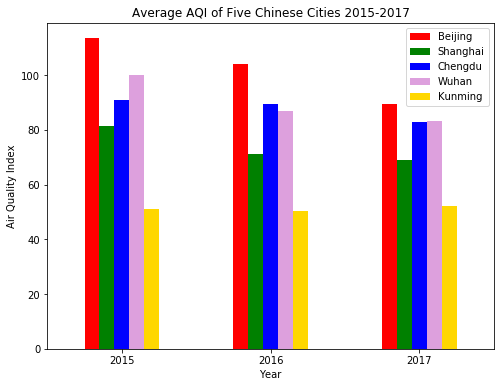

In [12]:
# Plot the trend of AQI of five cities in the past three years using bar chart
dat_AQI_Year = dat.loc[dat['Type'] == 'AQI',
                          ['Year','Beijing','Shanghai','Chengdu','Wuhan','Kunming']].groupby('Year').mean()
dat_AQI_Year.head()
dat_AQI_Year.plot(kind='bar',color = ['r','green','b','plum','gold'],figsize=(8,6),align = 'center')
plt.legend(('Beijing','Shanghai','Chengdu','Wuhan','Kunming'),bbox_to_anchor=(1, 1))
plt.title('Average AQI of Five Chinese Cities 2015-2017')
plt.xlabel('Year')
plt.ylabel('Air Quality Index')
plt.xticks(np.arange(3), ('2015', '2016', '2017'),rotation=0)
plt.savefig('Average AQI of Five Chinese Cities 2015-2017.png')

The overall AQI trend is decreasing for those five cities from 2015 to 2017. It is noticed that Beijing,Wuhan and Shanghai AQI have a remarkable decline in the past three years. This is because that the governement takes action in controlling vehicle population, reducing coal consumption and improving pollutants emission standard. Kunming has maintained a relative stable AQI level over the years. The reason is that Kunming targets a tourism city and little industry is allowed to develop. 

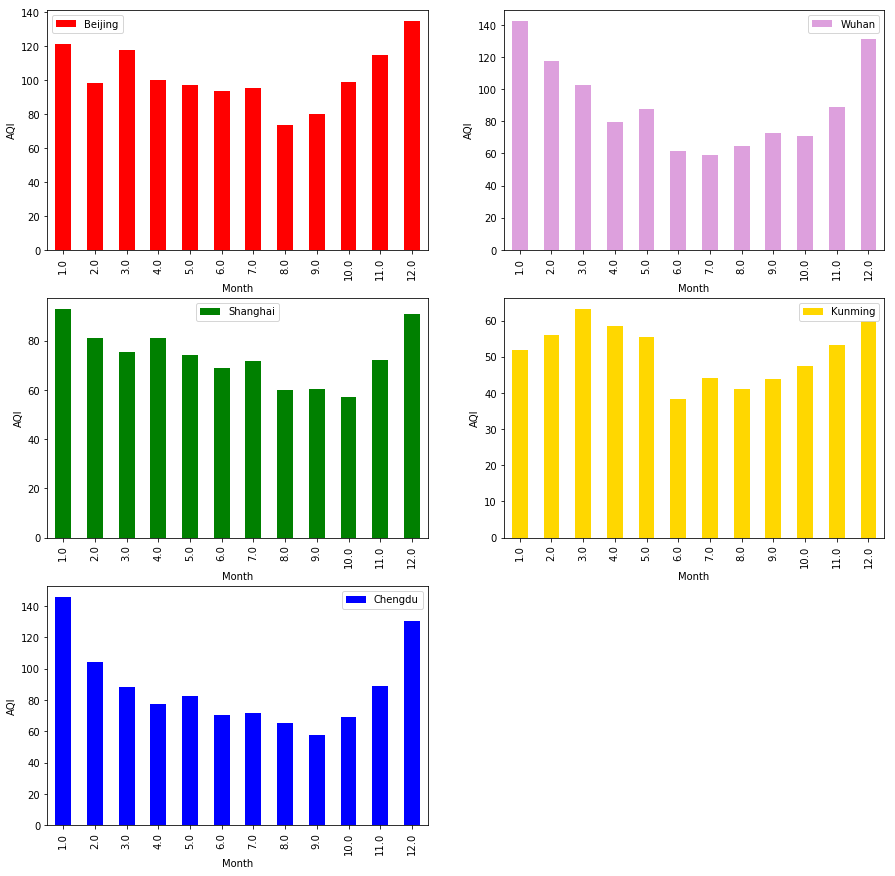

In [13]:
# AQI trend from January to December from 2015-2017
dat_AQI_Month = dat.loc[dat['Type'] == 'AQI',
                          ['Month','Beijing','Shanghai','Chengdu','Wuhan','Kunming']].groupby('Month').mean()
fig, axes = plt.subplots(3,2,figsize=(15,15))
dat_AQI_Month['Beijing'].plot(kind = 'bar',ax=axes[0,0],color='r');axes[0,0].set_ylabel('AQI');axes[0,0].legend()
dat_AQI_Month['Shanghai'].plot(kind = 'bar',ax=axes[1,0],color='g');axes[1,0].set_ylabel('AQI');axes[1,0].legend()
dat_AQI_Month['Chengdu'].plot(kind = 'bar',ax=axes[2,0],color='b');axes[2,0].set_ylabel('AQI');axes[2,0].legend()
dat_AQI_Month['Wuhan'].plot(kind = 'bar',ax=axes[0,1],color='plum');axes[0,1].set_ylabel('AQI');axes[0,1].legend()
dat_AQI_Month['Kunming'].plot(kind = 'bar',ax=axes[1,1],color='gold');axes[1,1].set_ylabel('AQI');axes[1,1].legend()
axes[2,1].set_visible(False)
plt.savefig('AQI trend from Januray to December.png')

It shows clear signs that five cities have the same distribution which AQI reaches higher level in winter and lower level in summer. This could be attributed to the coal consumption during the heating season in those Chinese cities. 

<font size=4>4.3 Review of PM2.5

In [14]:
# Summarize the AQI for the five cities from 2015-2017
dat_PM25 = dat.loc[dat['Type'] == 'PM2.5',['Beijing','Shanghai','Chengdu','Wuhan','Kunming']]
dat_PM25.describe()

,Beijing,Shanghai,Chengdu,Wuhan,Kunming
count,25259.000000,25259.00000,25259.000000,25259.000000,25259.000000
mean,68.840407,45.75537,58.003855,59.154224,27.190181
std,71.479528,34.74359,41.961492,42.297485,14.821163
min,2.000000,3.00000,1.000000,3.000000,4.000000
25%,19.000000,21.00000,28.000000,29.000000,16.000000
50%,47.000000,36.00000,47.000000,49.000000,24.000000
75%,91.000000,59.00000,76.000000,77.000000,34.000000
max,692.000000,356.00000,338.000000,471.000000,145.000000


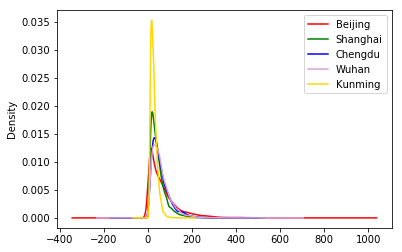

In [15]:
# PM2.5 density plot
dat_PM25 = dat.loc[dat['Type'] == 'PM2.5',['Beijing','Shanghai','Chengdu','Wuhan','Kunming']]
dat_PM25[['Beijing','Shanghai','Chengdu','Wuhan','Kunming']].plot(kind='kde',color = ['r','g','b','plum','gold'])
plt.savefig('PM2.5 density plot.png')

The density plot presents the distribution of PM2.5 for five cities. It can tell that Beijing has the largest range of PM2.5, which means that the variance of PM2.5 is the highest. Shanghai and Kunming have more uniform density distribution of PM2.5 and the fluctuations are more stable. 

Then we explore the relationship between AQI and PM2.5 in the five cities. The relationship between PM2.5 and AQI shows a linear relationship. 

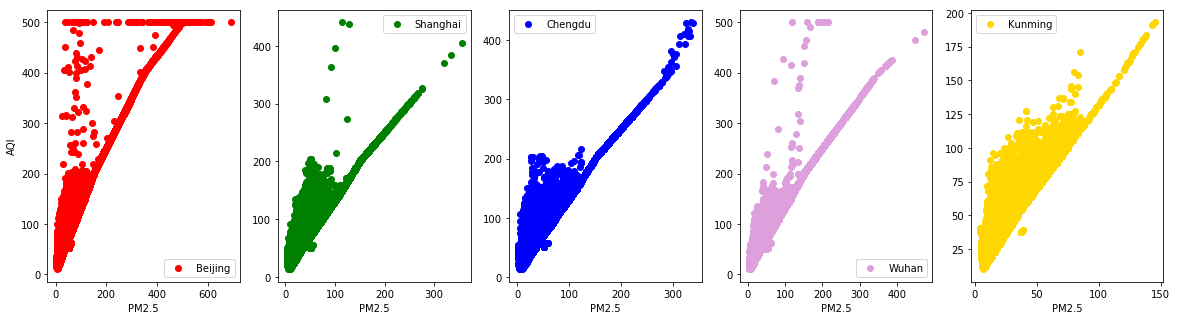

In [17]:
fig, axes = plt.subplots(1,5,figsize=(20,5))
a1 = plt.subplot(151)
a1.scatter(dat_PM25['Beijing'], dat_AQI['Beijing'],color='r');a1.set_ylabel('AQI');a1.set_xlabel('PM2.5');a1.legend()
a2 = plt.subplot(152)
a2.scatter(dat_PM25['Shanghai'], dat_AQI['Shanghai'],color='g');a2.set_xlabel('PM2.5');a2.legend()
a3 = plt.subplot(153)
a3.scatter(dat_PM25['Chengdu'], dat_AQI['Chengdu'],color='b');a3.set_xlabel('PM2.5');a3.legend()
a4 = plt.subplot(154)
a4.scatter(dat_PM25['Wuhan'], dat_AQI['Wuhan'],color='plum');a4.set_xlabel('PM2.5');a4.legend()
a5 = plt.subplot(155)
a5.scatter(dat_PM25['Kunming'], dat_AQI['Kunming'],color='gold');a5.set_xlabel('PM2.5');a5.legend()
plt.savefig('AQI and PM2.5.png')

<font size=4>4.4 Correlationship analysis

In [18]:
data = pd.read_csv('airquality2015.csv')
data['datetime']=data.Year.apply(str)+'-'+data.Month.apply(str)+'-'+data.Day.apply(str)+' '+data.Hour.apply(str)+':00:00' 
sub_dt = data[['datetime', 'Type', 'Beijing','Shanghai','Chengdu','Wuhan','Kunming']].copy()

In [19]:
sub_tt = sub_dt.pivot(index='datetime',columns= 'Type',values='Beijing')
sub_tt.head()

Type,AQI,CO,CO_24h,NO2,NO2_24h,O3,O3_24h,O3_8h,O3_8h_24h,PM10,PM10_24h,PM2.5,PM2.5_24h,SO2,SO2_24h
datetime,,,,,,,,,,,,,,,
2015-1-10 0:00:00,270.0,3.008,1.501,108.0,62.0,10.0,65.0,18.0,55.0,279.0,110.0,219.0,74.0,87.0,33.0
2015-1-10 10:00:00,206.0,4.333,2.200,98.0,73.0,9.0,65.0,8.0,55.0,190.0,129.0,155.0,113.0,64.0,46.0
2015-1-10 11:00:00,204.0,4.025,2.346,112.0,76.0,11.0,65.0,8.0,55.0,171.0,123.0,153.0,119.0,61.0,48.0
2015-1-10 12:00:00,185.0,3.367,2.468,111.0,80.0,19.0,65.0,9.0,55.0,175.0,127.0,139.0,124.0,53.0,50.0
2015-1-10 13:00:00,161.0,2.650,2.562,104.0,84.0,27.0,65.0,12.0,55.0,141.0,144.0,122.0,129.0,50.0,51.0


In [20]:
sub_tt.corr(method='pearson')

Type,AQI,CO,CO_24h,NO2,NO2_24h,O3,O3_24h,O3_8h,O3_8h_24h,PM10,PM10_24h,PM2.5,PM2.5_24h,SO2,SO2_24h
Type,,,,,,,,,,,,,,,
AQI,1.000000,0.759055,0.637495,0.704875,0.688004,-0.090208,-0.049888,-0.092378,-0.077975,0.936179,0.768943,0.956618,0.772713,0.511101,0.487675
CO,0.759055,1.000000,0.812612,0.756771,0.704109,-0.344545,-0.327597,-0.353358,-0.345512,0.686094,0.589549,0.822751,0.666606,0.551602,0.519419
CO_24h,0.637495,0.812612,1.000000,0.585073,0.819256,-0.294550,-0.360126,-0.338199,-0.388422,0.585880,0.693372,0.687337,0.843744,0.443919,0.595626
NO2,0.704875,0.756771,0.585073,1.000000,0.752422,-0.499295,-0.291469,-0.396390,-0.305950,0.678194,0.509472,0.763575,0.552775,0.612583,0.541177
NO2_24h,0.688004,0.704109,0.819256,0.752422,1.000000,-0.308684,-0.324038,-0.363908,-0.373674,0.656447,0.700873,0.721586,0.815078,0.570411,0.706912
O3,-0.090208,-0.344545,-0.294550,-0.499295,-0.308684,1.000000,0.682224,0.811626,0.656456,-0.105601,-0.085476,-0.183347,-0.148359,-0.216125,-0.249786
O3_24h,-0.049888,-0.327597,-0.360126,-0.291469,-0.324038,0.682224,1.000000,0.758527,0.977658,-0.065832,-0.069484,-0.117547,-0.127655,-0.286336,-0.318292
O3_8h,-0.092378,-0.353358,-0.338199,-0.396390,-0.363908,0.811626,0.758527,1.000000,0.766709,-0.093113,-0.095184,-0.197900,-0.175607,-0.281010,-0.287343
O3_8h_24h,-0.077975,-0.345512,-0.388422,-0.305950,-0.373674,0.656456,0.977658,0.766709,1.000000,-0.086865,-0.091473,-0.145108,-0.159302,-0.297686,-0.335224


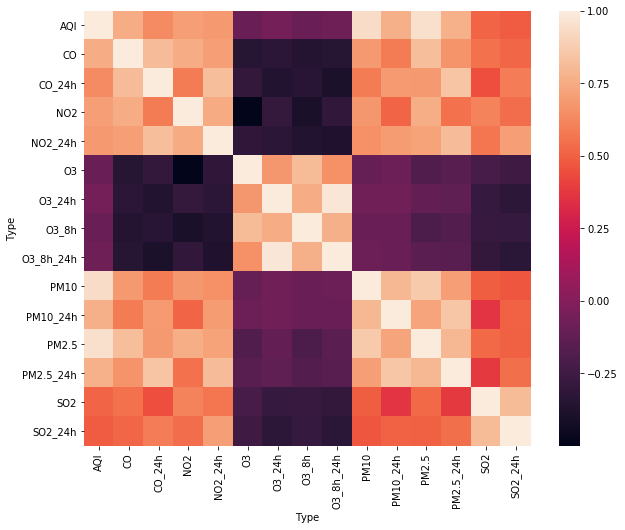

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(sub_tt.corr())
plt.savefig('heatmap.png')

In [22]:
# create predictors X and response y
X=sub_tt.iloc[:,1:15]
y=sub_tt.iloc[:,0]
X=X.fillna(0)

In [23]:
# Train an SVC with linear kernel
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=8, max_features=11, random_state=123)
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=11, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=8, n_jobs=1, oob_score=False, random_state=123,
           verbose=0, warm_start=False)

In [24]:
rf.feature_importances_

array([  6.61569883e-02,   1.29103544e-03,   7.67118220e-03,
         1.26317876e-04,   2.41710158e-03,   1.08694806e-03,
         1.51630239e-02,   4.73573661e-04,   1.73086898e-01,
         3.80147234e-03,   6.98992038e-01,   2.90228625e-02,
         1.42096228e-04,   5.68462362e-04])

In [26]:
# Beautify the display of feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                   columns=['importance'])
feature_importances = feature_importances.sort_values('importance',ascending=False)

feature_importances

,importance
Type,
PM2.5,0.698992
PM10,0.173087
CO,0.066157
PM2.5_24h,0.029023
O3_8h,0.015163
NO2,0.007671
PM10_24h,0.003801
O3,0.002417
CO_24h,0.001291


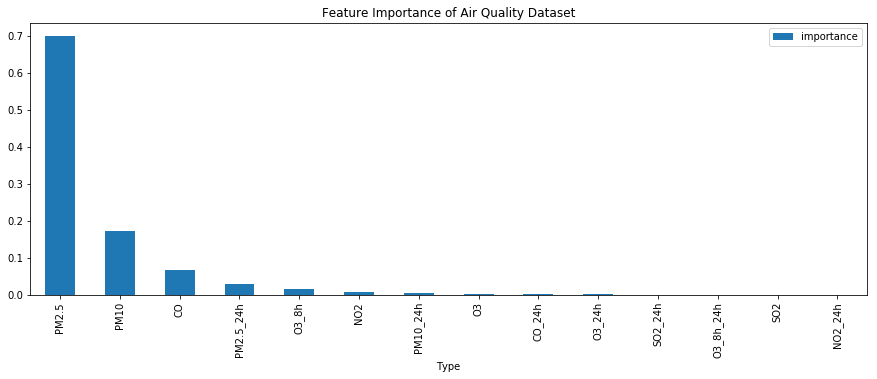

In [27]:
feature_importances.plot(kind = 'bar',figsize=(15,5),
                         title='Feature Importance of Air Quality Dataset')
plt.savefig("feature importance.png")

Based on the feature selection, we can see that the important value of PM2.5 is the highest, PM10 ranks the second score of importance score, CO and O3 rank the 3rd and 4th important features. This result is consistent with the correlationship analysis. 

# 5. Regression 

## 5.1 Regression Analysis

In [28]:
# Fit a full model
X=X.fillna(0)
mod_full = sm.OLS(y,X).fit()

# Summarize model
mod_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AQI   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 2.332e+04
Date:                Sat, 28 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:54:45   Log-Likelihood:                -36579.
No. Observations:                8067   AIC:                         7.319e+04
Df Residuals:                    8053   BIC:                         7.328e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CO            -0.5622      0.625     -0.899      0.369      -1.788       0.664
CO_24h        -2.2695      0.781     -2.905      0.004      -3.801      -0.738
NO2           -0.0752      0.024     -3.100      0.002      -0.123      -0.028
NO2_24h        0.3568      0.030     12.028      0.000       0.299       0.415
O3             0.0209      0.010      2.036      0.042       0.001       0.041
O3_24h        -0.0134      0.017     -0.780      0.435      -0.047       0.020
O3_8h          0.1828      0.011     17.179      0.000       0.162       0.204
O3_8h_24h      0.0118      0.020      0.599      0.549      -0.027       0.050
PM10           0.1066      0.005     22.827      0.000       0.097       0.116
PM10_24h       0.0662      0.006     11.996      0.000       0.055       0.077
PM2.5          0.9665      0.011     91.023      0.000       0.946       0.987
PM2.5_24h     -0.0274      0.013     -2.163      0.031      -0.052      -0.003
SO2            0.1107      0.034      3.215      0.001       0.043       0.178
SO2_24h       -0.0516      0.041     -1.259      0.208      -0.132       0.029
==============================================================================
Omnibus:                     9252.111   Durbin-Watson:                   0.628
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2052162.099
Skew:                           5.673   Prob(JB):                         0.00
Kurtosis:                      80.309   Cond. No.                     1.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above regression, we found that:

- PM10, PM2.5,O3 and SO2 have a positive effect on Air Quality Index (AQI). Increasing 1 unit in PM2.5 concentration would increase AQI by 0.9655 units after controlling for other factors. The positive effect of PM10, PM2.5,O3 and SO2 on AQI is statistically significant (P<0.001).

- Predictors including CO, O3_24h and SO2_24h do not have statistically significant effects on AQI (p-values > 0.05).

In [29]:
# Show coefficient estimates
mod_full.params

CO          -0.562167
CO_24h      -2.269521
NO2         -0.075210
NO2_24h      0.356784
O3           0.020924
O3_24h      -0.013365
O3_8h        0.182819
O3_8h_24h    0.011770
PM10         0.106633
PM10_24h     0.066194
PM2.5        0.966525
PM2.5_24h   -0.027391
SO2          0.110725
SO2_24h     -0.051577
dtype: float64

# 6. Predictive Modeling

Create the design matric, X include month, season, humidity, temperature, combined wind direction, combined wind speed, precipitation, cumulative precipitation

In [30]:
# Create the design matrix
y, X = dmatrices('AQI ~  0 + month + season + HUMI + TEMP'+ 
                 '+ cbwd + Iws + precipitation + Iprec ',
                 data=dat_pred,
                 return_type='dataframe')

Normalize the datasets. Split the datasets into 30% test data and 70% training data. 

In [31]:
# Normalize the X and Y variables
X_scale = preprocessing.MinMaxScaler().fit_transform(X)
y_scale = preprocessing.MinMaxScaler().fit_transform(y)

In [32]:
# 30-70% simple split
# To make the result reproducible, set the random_state
train_y,test_y,train_X,test_X = model_selection.train_test_split(y, X,
                                                                 test_size=0.3,
                                                                 random_state=123)

In [33]:
# 30-70% simple split for the scaled data
# To make the result reproducible, set the random_state
train_y_scale,test_y_scale,train_X_scale,test_X_scale = model_selection.train_test_split(y_scale, X_scale,
                                                                 test_size=0.3,
                                                                 random_state=123)

In [34]:
train_X.shape

(5160, 23)

In [35]:
train_y.shape

(5160, 1)

In [36]:
test_X.shape

(2212, 23)

In the predictive modelding part, K-Nearest Neighbors, regression tree, neural network and random forest will be utilized in order to predict the Air Quality Index. 

## 6.1 K-Nearest Neighbors

In [37]:
# tune the parameters using the GridSearchCV
knn = KNeighborsRegressor()

params = {'n_neighbors': np.arange(1,31),
          'weights':['uniform'],
          'algorithm':['auto']}

model_knn = GridSearchCV(knn, param_grid = params)

# fit the model
model_knn.fit(train_X_scale,train_y_scale)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]), 'weights': ['uniform'], 'algorithm': ['auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [38]:
 model_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}

In [39]:
knn_final = neighbors.KNeighborsRegressor(n_neighbors = 7,
                                     weights = 'uniform',
                                     algorithm = 'auto')

knn_final.fit(train_X_scale,train_y_scale)
pred_y_knnfinal = knn_final.predict(test_X_scale)

In [40]:
# Import the matplotlib.pyplot
import matplotlib.pyplot as plt

# Enable inline plotting in notebook
%matplotlib inline

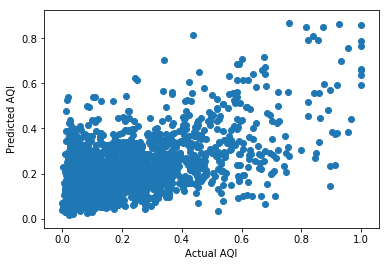

In [42]:
plt.scatter(test_y_scale, pred_y_knnfinal)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.savefig('knnfit.png')

In [43]:
# Calculate MAE
metrics.mean_absolute_error(test_y_scale, pred_y_knnfinal)

0.10675072840923047

In [44]:
# Calculate MSE
metrics.regression.mean_squared_error(test_y_scale, pred_y_knnfinal)

0.022310653214284749

In [45]:
# Calculate R squared
metrics.r2_score(test_y_scale, pred_y_knnfinal)

0.33485136203366328

## 6.2 Regression Tree

In [46]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [47]:
# initial model
tree = DecisionTreeRegressor()

params = {'min_samples_split': np.arange(2,81)}

model_tree = GridSearchCV(tree, param_grid=params)

# fit the model
model_tree.fit(train_X,train_y)

#prediction
prediction_tree = model_tree.predict(test_X)

In [48]:
 model_tree.best_params_

{'min_samples_split': 80}

In [49]:
tree_final = DecisionTreeRegressor(min_samples_split = 80)
tree_final.fit(train_X,train_y)
pred_y_treefinal = tree_final.predict(test_X)

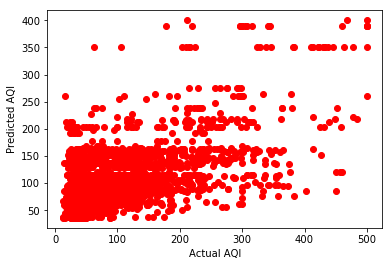

In [50]:
plt.scatter(test_y, pred_y_treefinal, color = 'red')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.savefig('treefit.png')

In [51]:
# Calculate MAE
metrics.mean_absolute_error(test_y, pred_y_treefinal)

54.972446541281101

In [52]:
# Calculate MSE
metrics.regression.mean_squared_error(test_y, pred_y_treefinal)

5591.0745643030286

In [53]:
# Calculate R squared
metrics.r2_score(test_y, pred_y_treefinal)

0.30005798974880915

## 6.3 Neural Network 

In [54]:
from sklearn.neural_network import MLPRegressor

In [55]:
import warnings
warnings.filterwarnings('ignore')
# initial model
ann = MLPRegressor()

# tune the hyperparameter
params = {'hidden_layer_sizes':[(300,), (250,), (200,), 
                     (150,),  (100,), (50,), (50,10), (9,7,5,3)]}

model_ann = GridSearchCV(ann, param_grid=params)

# fit the model
model_ann.fit(train_X_scale,train_y_scale)

# prediction
prediction_ann = model_ann.predict(test_X_scale)

In [56]:
model_ann.best_params_

{'hidden_layer_sizes': (200,)}

In [57]:
ann_final = MLPRegressor(hidden_layer_sizes =(200,))
ann_final.fit(train_X_scale,train_y_scale)
pred_y_annfinal = ann_final.predict(test_X_scale)

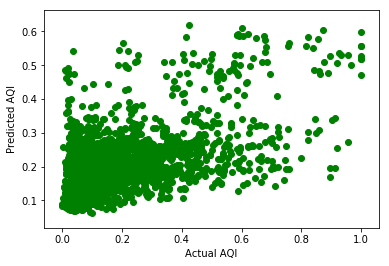

In [58]:
plt.scatter(test_y_scale, pred_y_annfinal, color = 'green')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.savefig('annfit.png')

In [59]:
# Calculate MAE
metrics.mean_absolute_error(test_y_scale, pred_y_annfinal)

0.11976590652752858

In [60]:
# Calculate MSE
metrics.regression.mean_squared_error(test_y_scale, pred_y_annfinal)

0.025270065728750714

In [61]:
# Calculate R squared
metrics.r2_score(test_y_scale, pred_y_annfinal)

0.246622246360921

## 6.4 Random Foreset

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf = RandomForestRegressor(n_estimators=5, max_features=10, random_state=123)

In [64]:
rf.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=5, n_jobs=1, oob_score=False, random_state=123,
           verbose=0, warm_start=False)

In [65]:
# Show feature importance
rf.feature_importances_

array([ 0.00852973,  0.00384783,  0.13232049,  0.00174376,  0.01006589,
        0.0048296 ,  0.00455087,  0.00304423,  0.00360246,  0.00141702,
        0.02099554,  0.00404687,  0.00097822,  0.00354624,  0.00968417,
        0.0252874 ,  0.02049129,  0.02221074,  0.24532837,  0.22601647,
        0.23285665,  0.00821772,  0.00638844])

In [66]:
# Beautify the display of feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_X.columns,
                                   columns=['importance'])
feature_importances = feature_importances.sort_values('importance',ascending=False)

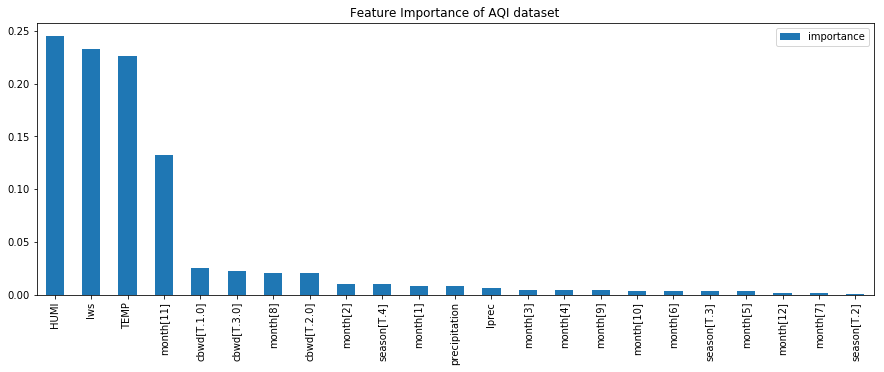

In [67]:
feature_importances.plot(kind = 'bar',figsize=(15,5),
                         title='Feature Importance of AQI dataset')
plt.savefig('rt importance.png')

In [68]:
rf2 = RandomForestRegressor()

parameters = {'n_estimators':[10,50,80,100,200,300,400,500],
              'max_features':[1,2,3,4,5,10],
              'random_state':[123]}

grid_rf = model_selection.GridSearchCV(rf2, parameters)

grid_rf.fit(train_X,train_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 80, 100, 200, 300, 400, 500], 'max_features': [1, 2, 3, 4, 5, 10], 'random_state': [123]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [69]:
# Show best parameters
grid_rf.best_params_

{'max_features': 10, 'n_estimators': 500, 'random_state': 123}

In [70]:
# Train a new RF with best parameters
rf_final = RandomForestRegressor(n_estimators=500, 
                                  max_features=10, 
                                  random_state=123)

In [71]:
rf_final.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=123,
           verbose=0, warm_start=False)

In [72]:
# Predict on test set
pred_y_rffinal = rf_final.predict(test_X)

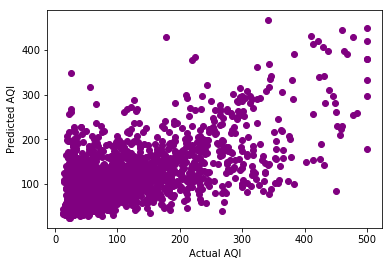

In [73]:
plt.scatter(test_y, pred_y_rffinal, color = 'purple')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.savefig('rf fit.png')

In [74]:
# Calculate MAE
metrics.mean_absolute_error(test_y, pred_y_rffinal)

49.948224130252406

In [75]:
# Calculate MSE
metrics.regression.mean_squared_error(test_y, pred_y_rffinal)

4921.5975858286129

In [76]:
# Calculate R squared
metrics.r2_score(test_y, pred_y_rffinal)

0.38386926014789924

## 6.5 Evaluation

In [77]:
para = [model_knn.best_params_,
            model_tree.best_params_,
            model_ann.best_params_,
            grid_rf.best_params_]

mae = [metrics.mean_absolute_error(test_y_scale, pred_y_knnfinal),
       metrics.mean_absolute_error(test_y, pred_y_treefinal),
       metrics.mean_absolute_error(test_y_scale, pred_y_annfinal),
       metrics.mean_absolute_error(test_y, pred_y_rffinal)]

mse = [metrics.regression.mean_squared_error(test_y_scale, pred_y_knnfinal),
       metrics.regression.mean_squared_error(test_y, pred_y_treefinal),
       metrics.regression.mean_squared_error(test_y_scale, pred_y_annfinal),
       metrics.regression.mean_squared_error(test_y, pred_y_rffinal)]

r2 = [metrics.r2_score(test_y_scale, pred_y_knnfinal),
      metrics.r2_score(test_y, pred_y_treefinal),
      metrics.r2_score(test_y_scale, pred_y_annfinal),
      metrics.r2_score(test_y, pred_y_rffinal)]

In [78]:
pd.DataFrame({'Mean Absolute Error':mae, 'Mean Square Error':mse, 'R Squared':r2, 'Parameters':para},
             index = ['K-Nearest Neighbors','Regression Tree','Neural Network','Random Foreset'])

,Mean Absolute Error,Mean Square Error,Parameters,R Squared
K-Nearest Neighbors,0.106751,0.022311,"{'algorithm': 'auto', 'n_neighbors': 7, 'weigh...",0.334851
Regression Tree,54.972447,5591.074564,{'min_samples_split': 80},0.300058
Neural Network,0.119766,0.025270,"{'hidden_layer_sizes': (200,)}",0.246622
Random Foreset,49.948224,4921.597586,"{'max_features': 10, 'n_estimators': 500, 'ran...",0.383869


From the above comparison, we can see that random forest model has a better performance than k-NN, regression tree and neural network. 
The predicted count of AQI for K-NN and neural network is scaled. Since regression tree and random forest are tested on the unscaled data, the MAE and MSE are much higher than those of the other three models. 

# 7. Conclusions and Future Improvement

In this project, the air quality data associated with the pollutants are collected and summarized in five Chinese cities from 2015 to 2017. The relationship between Air Quality Index (AQI) and chemical pollutants are explored in depth using various visualization methods, regression analysis and predictive modeling. The conclusions are obtained as follows:
- The overall air quality has been improved from 2015 to 2017. Summer time shows a better air quality among the four seasons. 
- Beijing has the worst air quality index while Kunming has the lowest air quality index in the past three years. 
- PM2.5, PM10 and CO concentration have the strong impact on the air quality index (AQI) based on the correlationship analysis and random forest feature selection. 
- According to the regression analysis, R squared value of the model is 0.979, which means a strong linear relationship between the AQI and other factors. 
- Prediction modeling utilizes the K-NN, regression tree, neural network and random forest algorithms to predict the AQI by weather factors. It shows that the random forest has the highest performance. 

The cause of air quality has been determined in this project. PM2.5, PM10 and CO concentrations play a significant role in air quality. Therefore, it is highly recommend to take approprite action to control the carbon emmission. The recommendations are as follows:
- Restrict the new cars growth
- Develop the environmental energy-efficient vehicles
- Shut down the polluting factories
- Reduce burning fossil fuels like coal. 

The benefits of this project include:
- Find the cause of influencing the air quality by analyzing the data
- Provide the useful information to the government and environmental protection agency to conduct relative research
- Improve the lifehood of the people and reduce the risk of diabets, heart disearse and cancer